## **Libraries**

In [ ]:
import tensorflow as tf 
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

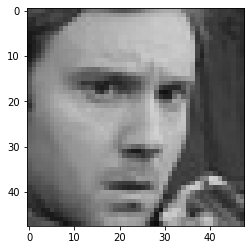

In [ ]:
img_array = cv2.imread("/content/drive/MyDrive/Datasets/ExpressionRecognition/images/images/train/0/0.jpg")
img_array.shape
plt.imshow(img_array)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Load Training Images from drive**

In [ ]:
Datadirectory = "/content/drive/MyDrive/Datasets/ExpressionRecognition/images/images/train/"
classes = ["0", "1", "2", "3", "4", "5", "6"]

In [ ]:
'''
for category in classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))

'''

'\nfor category in classes:\n    path = os.path.join(Datadirectory, category)\n    for img in os.listdir(path):\n        img_array = cv2.imread(os.path.join(path, img))\n\n'

## **Image Sizing**

Adding Clarity - Transfer Learning

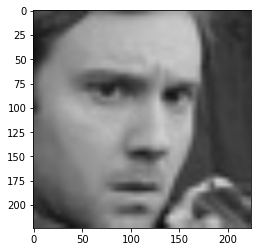

In [ ]:
img_size = 224
new_array = cv2.resize(img_array, (img_size, img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
new_array.shape

(224, 224, 3)

## **Training-Data**

In [ ]:
training_data = []
def create_training_data():
    for category in classes:
        path = os.path.join(Datadirectory, category)
        class_num = classes.index(category)
        i=0
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img))
                new_array = cv2.resize(img_array, (img_size, img_size))
                training_data.append([new_array, class_num])
            except Exception as e:
                print(e)
            i+=1
            if(i > 750):
                break;

        print(len(training_data))

create_training_data()

751
1187
1938
2689
3440
3440
3440


In [ ]:
print(len(training_data))

3440


## **Shuffle**




In [ ]:
#it should not learn the sequence. so the deep learning architecture should be dynamic and robust
import random 
random.shuffle(training_data)


In [ ]:
X = []
y = []
for  features, labels in training_data:
    X.append(features)
    y.append(labels)

#converting it to 4 dimensions, since mobilenet uses depth wise CNN, so it takes four dimensions
X = np.array(X).reshape(-1, img_size, img_size, 3)
X.shape
    

(3440, 224, 224, 3)

# **Normalize**

In [ ]:
X = X/255.0

In [ ]:
y = np.array(y)
y.shape

(3440,)

## **Transfer Learning**

In [ ]:
tf.compat.v1.enable_eager_execution()
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.data.experimental.enable_debug_mode()
tf.config.run_functions_eagerly(True)

In [ ]:
model = tf.keras.applications.MobileNetV2()

14548992/14536120 [==============================] - 0s 0us/step


In [ ]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

In [ ]:
base_input = model.layers[0].input

In [ ]:
base_input = model.layers[0].input #1st layer
base_output = model.layers[-2].output #layer of second from back

In [ ]:
final_output = tf.keras.layers.Dense(128)(base_output)
final_output = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(64)(final_output)
final_output = tf.keras.layers.Activation('relu')(final_output)
final_output = tf.keras.layers.Dense(7, activation="softmax")(final_output)

In [ ]:
new_model = tf.keras.Model(inputs = base_input, outputs = final_output)
new_model.summary()

                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 28, 28, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 28, 28, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
          

In [ ]:

new_model.compile( loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"], run_eagerly=True)
print(tf.__version__)

2.8.0


In [ ]:
X.shape
y.shape

(3440,)

In [ ]:

new_model.fit(X, y, epochs = 10)
new_model.save('/content/drive/MyDrive/Datasets/ExpressionRecognition/final_model.h5') 

Epoch 1/10
108/108 [==============================] - 39s 356ms/step - loss: 0.2605 - accuracy: 0.9070
Epoch 2/10
108/108 [==============================] - 38s 353ms/step - loss: 0.2387 - accuracy: 0.9192
Epoch 3/10
108/108 [==============================] - 38s 354ms/step - loss: 0.2320 - accuracy: 0.9195
Epoch 4/10
108/108 [==============================] - 38s 348ms/step - loss: 0.1960 - accuracy: 0.9308
Epoch 5/10
108/108 [==============================] - 38s 349ms/step - loss: 0.1633 - accuracy: 0.9401
Epoch 6/10
108/108 [==============================] - 38s 348ms/step - loss: 0.2031 - accuracy: 0.9317
Epoch 7/10
108/108 [==============================] - 38s 348ms/step - loss: 0.1537 - accuracy: 0.9422
Epoch 8/10
108/108 [==============================] - 38s 351ms/step - loss: 0.1368 - accuracy: 0.9538
Epoch 9/10
108/108 [==============================] - 37s 346ms/step - loss: 0.1429 - accuracy: 0.9500
Epoch 10/10
108/108 [==============================] - 37s 346ms/step - l

## **Load Model**

In [ ]:
new_model.save('/content/drive/MyDrive/Datasets/ExpressionRecognition/final_model.h5') 

In [ ]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Datasets/ExpressionRecognition/final_model.h5")

# **Face Detection Algorithm**

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')



# **Testing**

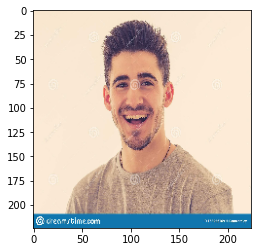

In [ ]:
frame = cv2.imread('/content/image.jpg')
frame = cv2.resize(frame, (img_size, img_size))
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)


In [ ]:
gray.shape

(224, 224)

In [ ]:
faces = faceCascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("face not detected")
    else:
        for (ex, ey, ew, eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]


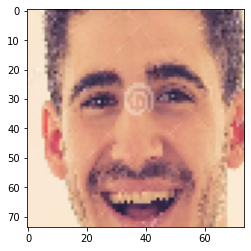

In [ ]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

final_image = cv2.resize(face_roi, (224, 224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255


In [ ]:
predictions = new_model.predict(final_image)
print(predictions[0])
np.argmax(predictions)

[8.0648690e-02 1.9815569e-03 2.4880750e-01 6.5442234e-01 1.4022692e-02
 6.0459723e-05 5.6714547e-05]


3

## **Real Time Video Demo**

In [ ]:
from keras.preprocessing.image import img_to_array
import imutils
import cv2
from keras.models import load_model
import numpy as np

# parameters for loading data and images
detection_model_path = '/content/drive/MyDrive/Datasets/ExpressionRecognition/images/haar-cascade-files-master/haarcascade_frontalface_default.xml'
emotion_model_path = '/content/_mini_XCEPTION.102-0.66.hdf5'

# hyper-parameters for bounding boxes shape
# loading models
face_detection = cv2.CascadeClassifier(detection_model_path)
emotion_classifier = load_model(emotion_model_path, compile=False)
EMOTIONS = ["angry" ,"disgust","scared", "happy", "sad", "surprised",
 "neutral"]


#feelings_faces = []
#for index, emotion in enumerate(EMOTIONS):
   # feelings_faces.append(cv2.imread('emojis/' + emotion + '.png', -1))

# starting video streaming
cv2.namedWindow('your_face')
camera = cv2.VideoCapture(0)
while True:
    frame = camera.read()[1]
    #reading the frame
    frame = imutils.resize(frame,width=300)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_detection.detectMultiScale(gray,scaleFactor=1.1,minNeighbors=5,minSize=(30,30),flags=cv2.CASCADE_SCALE_IMAGE)
    
    canvas = np.zeros((250, 300, 3), dtype="uint8")
    frameClone = frame.copy()
    if len(faces) > 0:
        faces = sorted(faces, reverse=True,
        key=lambda x: (x[2] - x[0]) * (x[3] - x[1]))[0]
        (fX, fY, fW, fH) = faces
                    # Extract the ROI of the face from the grayscale image, resize it to a fixed 28x28 pixels, and then prepare
            # the ROI for classification via the CNN
        roi = gray[fY:fY + fH, fX:fX + fW]
        roi = cv2.resize(roi, (64, 64))
        roi = roi.astype("float") / 255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi, axis=0)
        
        
        preds = emotion_classifier.predict(roi)[0]
        emotion_probability = np.max(preds)
        label = EMOTIONS[preds.argmax()]
    else: continue

 
    for (i, (emotion, prob)) in enumerate(zip(EMOTIONS, preds)):
                # construct the label text
                text = "{}: {:.2f}%".format(emotion, prob * 100)

                # draw the label + probability bar on the canvas
               # emoji_face = feelings_faces[np.argmax(preds)]

                
                w = int(prob * 300)
                cv2.rectangle(canvas, (7, (i * 35) + 5),
                (w, (i * 35) + 35), (0, 0, 255), -1)
                cv2.putText(canvas, text, (10, (i * 35) + 23),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45,
                (255, 255, 255), 2)
                cv2.putText(frameClone, label, (fX, fY - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
                cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
                              (0, 0, 255), 2)
#    for c in range(0, 3):
#        frame[200:320, 10:130, c] = emoji_face[:, :, c] * \
#        (emoji_face[:, :, 3] / 255.0) + frame[200:320,
#        10:130, c] * (1.0 - emoji_face[:, :, 3] / 255.0)


    cv2.imshow('your_face', frameClone)
    cv2.imshow("Probabilities", canvas)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

camera.release()
cv2.destroyAllWindows()


OSError: ignored

Error:
Mar 21, 2022, 12:36:20 PM	WARNING	WARNING:root:kernel 0d8f2dbf-612c-4e94-9a52-5f3adbcaab3f restarted
Mar 21, 2022, 12:36:20 PM	INFO	KernelRestarter: restarting kernel (1/5), keep random ports
Mar 21, 2022, 12:36:14 PM	WARNING	tcmalloc: large alloc 21600165888 bytes == 0x5560f29dc000 @ 0x7f923fe351e7 0x7f92339eb0ce 0x7f9233a41cf5 0x7f9233a41e08 0x7f9233b010f4 0x7f9233b0430c 0x7f9233c8b3ac 0x7f9233c8be10 0x555fa3491600 0x555fa34911d9 0x7f9233b0b8a3 0x555fa3473883 0x555fa357b1a6 0x555fa3501e92 0x555fa34ff02f 0x555fa34fed43 0x555fa34fd1b0 0x555fa3490229 0x555fa3490120 0x555fa3503f33 0x555fa34ff02f 0x555fa3491aba 0x555fa3500108 0x555fa34ff02f 0x555fa3491aba 0x555fa3500cd4 0x555fa34ff66e 0x555fa349236c 0x555fa3492571 0x555fa3501633 0x555fa34ff1c0
Mar 21, 2022, 12:36:13 PM	WARNING	tcmalloc: large alloc 2700025856 bytes == 0x556051ae6000 @ 0x7f923fe351e7 0x7f92339eb0ce 0x7f9233a47715 0x7f9233a47d1b 0x7f9233ae8333 0x555fa349034c 0x555fa3490120 0x555fa3504679 0x555fa34ff02f 0x555fa34fed43 0x555fa34fd1b0 0x555fa3490229 0x555fa3490120 0x555fa3503f33 0x555fa34ff02f 0x555fa3491aba 0x555fa3500108 0x555fa34ff02f 0x555fa3491aba 0x555fa3500cd4 0x555fa34ff66e 0x555fa349236c 0x555fa3492571 0x555fa3501633 0x555fa34ff1c0 0x555fa3491aba 0x555fa3500cd4 0x555fa34ff02f 0x555fa3491aba 0x555fa3500108 0x555fa34919da
Mar 21, 2022, 12:33:26 PM	WARNING	WARNING:root:kernel 0d8f2dbf-612c-4e94-9a52-5f3adbcaab3f restarted
Mar 21, 2022, 12:33:26 PM	INFO	KernelRestarter: restarting kernel (1/5), keep random ports